# MLM statistics + visualization #

This notebook is used for multilevel linear analysis for fractional occupancy and dwell time for each state. 

Number of states: 6

**Last update:** 12.08.2022

### Step 1: Loading libraries ###

In [1]:
#Loading libraries
library(readr)
library(magrittr)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)
library(sjPlot)
library(sjmisc)
library(ggplot2)
library(RColorBrewer)
library(pbkrtest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




### Step 1: Loading data ###

In [2]:
#Loading csv data
data <- read_csv("data/6_states/6_df_merge.csv", show_col_types = FALSE)

#Changing the names of columns
colnames(data)[5] <- "FO"
colnames(data)[6] <- "DT"

#Loading data as categorical
data$Subject <- as.factor(data$Subject)
data$Session <- as.factor(data$Session)
data$Run <- as.factor(data$Run)
data$State <- as.factor(data$State)

In [3]:
#Printing data
head(data)

Subject,Session,Run,State,FO,DT
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,PLCB,1,1,20.73733,5.294118
0,PLCB,1,2,16.12903,4.375000
0,PLCB,1,3,11.98157,5.777778
0,PLCB,1,4,17.97235,4.875000
0,PLCB,1,5,19.35484,7.000000
0,PLCB,1,6,13.82488,5.454545


--------------------------

### **Resting-state vs. music listening** ###

In [5]:
#Selecting data from run 1 & 2
s6_data_run12 <- filter(data, Run != 3)

### Step 2: Performing analysis for fractional occupancy ###

In [13]:
#Iterating over states

for (i in 1:6) {
    
    s6_data_fo_state <- filter(s6_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s6_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s6_data_fo_state) #performing MLM analysis
    s6_stats_fo <- anova(s6_m_fo)
    print(s6_stats_fo)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          8.1801  8.1801     1 16.147  0.8967 0.3576
Session     19.6173 19.6173     1 31.252  2.1505 0.1525
Run:Session  7.2660  7.2660     1 36.016  0.7965 0.3781
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          9.0665  9.0665     1 12.229  0.9755 0.3424
Session     26.9837 26.9837     1 14.287  2.9034 0.1100
Run:Session  0.2119  0.2119     1 26.680  0.0228 0.8811
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.26198 0.26198     1 23.720  0.0382 0.8468
Session     0.07240 0.07240     1 27.148  0.0105 0.9190
Run:Session 2.63619 2.63619     1 35.963  0.3840 0.5394
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         21.7502 21.7502     1 13.350  2.0803 0.1723
Session      0.9378  0.9378     1 19.463  0.0897 0.7677
Run:Session  5.5642  5.5642     1 24.202  0.5322 0.4727
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         34.448  34.448     1 12.047  2.8156 0.1191
Session     10.876  10.876     1 25.649  0.8890 0.3546
Run:Session  1.122   1.122     1 25.022  0.0917 0.7645
[1] "MLM for state: 6"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         11.4775 11.4775     1 14.315  1.8253 0.1977
Session     12.3910 12.3910     1 18.334  1.9705 0.1771
Run:Session  3.3408  3.3408     1 25.538  0.5313 0.4727


### Step 3: Performing analysis for dwell time ###

In [11]:
#Iterating over states

for (i in 1:6) {
    
    s6_data_dt_state <- filter(s6_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s6_m_dt <- lmer(DT ~ Run*Session + (1+ Run + Session|Subject), data=s6_data_dt_state) #performing MLM analysis
    s6_stats_dt <- anova(s6_m_dt)
    print(s6_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.8e+00”


Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.20742 0.20742     1 12.881  0.2760 0.6082
Session     0.60600 0.60600     1 18.027  0.8065 0.3810
Run:Session 0.99230 0.99230     1 36.072  1.3207 0.2580
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -3.7e+00”


Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.63626 0.63626     1 14.947  0.9924 0.33502  
Session     1.92435 1.92435     1 24.517  3.0013 0.09576 .
Run:Session 0.04669 0.04669     1 26.689  0.0728 0.78936  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.266103 0.266103     1 14.869  0.2234 0.6433
Session     0.054913 0.054913     1 13.400  0.0461 0.8332
Run:Session 0.008194 0.008194     1 23.554  0.0069 0.9346
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF   DenDF F value Pr(>F)
Run         0.93936 0.93936     1 13.3556  2.2377 0.1579
Session     0.02560 0.02560     1 11.4380  0.0610 0.8093
Run:Session 0.07941 0.07941     1  9.2106  0.1892 0.6736
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.05434 1.05434     1 12.382  1.4979 0.2438
Session     0.00334 0.00334     1 22.349  0.0047 0.9457
Run:Session 0.00115 0.00115     1 24.992  0.0016 0.9681
[1] "MLM for state: 6"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.48550 0.48550     1 13.170  0.9211 0.3545
Session     0.79164 0.79164     1 15.355  1.5020 0.2388
Run:Session 0.53372 0.53372     1 24.819  1.0126 0.3240


--------------------

### **Resting-state before music listening vs. resting-state after music listening** ###

In [14]:
#Selecting data from run 1 & 3
s6_data_run13 <- filter(data, Run != 2)

### Step 4: Performing analysis for fractional occupancy ###

In [17]:
#Iterating over states

for (i in 1:6) {
    
    s6_data_fo_state <- filter(s6_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s6_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s6_data_fo_state) #performing MLM analysis
    s6_stats_fo <- anova(s6_m_fo)
    print(s6_stats_fo)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -2.6e-01”


Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.9268  0.9268     1 19.510  0.1393 0.7130
Session     3.3529  3.3529     1 14.873  0.5040 0.4887
Run:Session 0.1274  0.1274     1 27.963  0.0192 0.8909
[1] "MLM for state: 2"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          0.1259  0.1259     1 27.270  0.0142 0.9059
Session     16.5470 16.5470     1 14.031  1.8692 0.1931
Run:Session  0.2265  0.2265     1 27.993  0.0256 0.8741
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         9.8924  9.8924     1 20.284  1.5176 0.2321
Session     2.8843  2.8843     1 14.573  0.4425 0.5163
Run:Session 0.1274  0.1274     1 28.000  0.0195 0.8898
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.82235 0.82235     1 14.004  0.1110 0.7439
Session     0.40950 0.40950     1 13.902  0.0553 0.8175
Run:Session 0.59816 0.59816     1 13.879  0.0808 0.7805
[1] "MLM for state: 5"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         22.4199 22.4199     1 14.451  1.8782 0.1915
Session      9.3886  9.3886     1 16.363  0.7865 0.3880
Run:Session  1.8723  1.8723     1 28.000  0.1568 0.6951
[1] "MLM for state: 6"
Type III Analysis of Variance Table with Satterthwaite's method
       

### Step 5: Performing analysis for dwell time ###

In [24]:
#Iterating over states

for (i in 1:6) {
    
    s6_data_dt_state <- filter(s6_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s6_m_dt <- lmer(DT ~ Run*Session + (1 + Run|Subject), data=s6_data_dt_state) #performing MLM analysis
    s6_stats_dt <- anova(s6_m_dt)
    print(s6_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.67406 0.67406     1 18.278  0.8355 0.3726
Session     0.03343 0.03343     1 42.000  0.0414 0.8397
Run:Session 0.00169 0.00169     1 42.000  0.0021 0.9637
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -1.6e-02”


Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.00053 0.00053     1 36.495  0.0007 0.97846  
Session     3.14854 3.14854     1 42.000  4.3518 0.04308 *
Run:Session 0.14496 0.14496     1 42.000  0.2004 0.65673  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.44137 0.44137     1 29.752  0.3819 0.5413
Session     0.02942 0.02942     1 42.000  0.0255 0.8740
Run:Session 0.06259 0.06259     1 42.000  0.0542 0.8171
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         0.2838  0.2838     1    14  0.2500 0.6249
Session     1.4037  1.4037     1    28  1.2364 0.2756
Run:Session 1.3830  1.3830     1    28  1.2182 0.2791
[1] "MLM for state: 5"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         1.45382 1.45382     1    14  1.6222 0.2235
Session     0.00287 0.00287     1    28  0.0032 0.9553
Run:Session 0.00219 0.00219     1    28  0.0024 0.9609
[1] "MLM for state: 6"
Type III Analysis of Variance Table with Satterthwaite's method
             Su

### Custom contrasts ###

In [23]:
em_dt = emmeans(s6_m_dt, specs = pairwise ~ Session)
em_dt$emmeans
em_dt$contrasts

NOTE: Results may be misleading due to involvement in interactions



 Session emmean    SE   df lower.CL upper.CL
 LSD       5.34 0.161 35.5     5.02     5.67
 PLCB      4.88 0.161 35.5     4.56     5.21

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

 contrast   estimate   SE df t.ratio p.value
 LSD - PLCB    0.458 0.22 28   2.086  0.0462

Results are averaged over the levels of: Run 
Degrees-of-freedom method: kenward-roger 

### Step 5: Plotting the results ###

In [25]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:sjmisc’:

    %nin%


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [26]:
# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=18, colour='#262626ff', margin = margin(t = 0, r = 2, b = 0, l = 16)),
          axis.text.x = element_text(size=18, colour='#262626ff', margin = margin(t = 2, r =0, b = 16, l = 0)),
          axis.title.y = element_text(size=20, colour='#262626ff'),
          axis.title.x  = element_text(size=20, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.5),
          #panel.background = element_rect(fill="transparent",colour=NA),
          #plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          legend.key.size = unit(0.7, 'cm'),
          legend.key.height = unit(0.7, 'cm'),
          legend.key.width = unit(1.5, 'cm'),
          legend.title = element_text(size=13),
          legend.text = element_text(size=11),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=20),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.20, "cm"),
          aspect.ratio = 1.5,
          )

#### **Plotting the results for resting-state vs. music listening** ####

#### Step 5.1: Plotting the results for fractional occupancy ####

In [42]:
#Settings
options(repr.plot.width = 17, repr.plot.height = 5)
state.names <- c("State 1", "State 2", "State 3", "State 4", "State 5", "State 6")
names(state.names) <- c("1", "2", "3", "4", "5", "6")

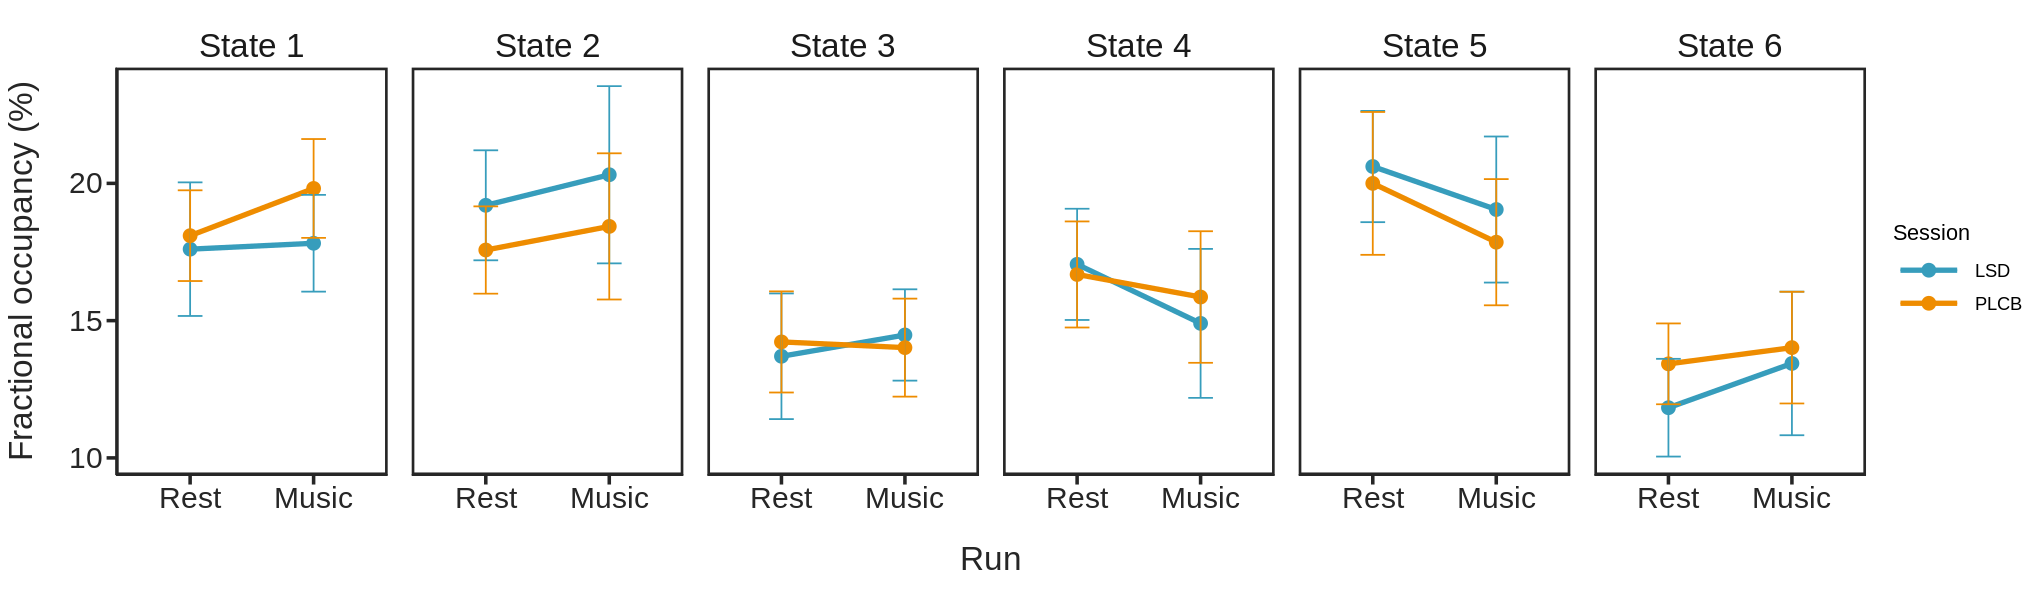

In [43]:
s6_fo_1vs2 <- ggplot(s6_data_run12, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s6_fo_1vs2)

In [44]:
#Saving the plot
ggsave("Figures/6_states/fo_1vs2.jpg", width = 17, height = 5)

#### Step 5.2: Plotting the results for dwell time ####

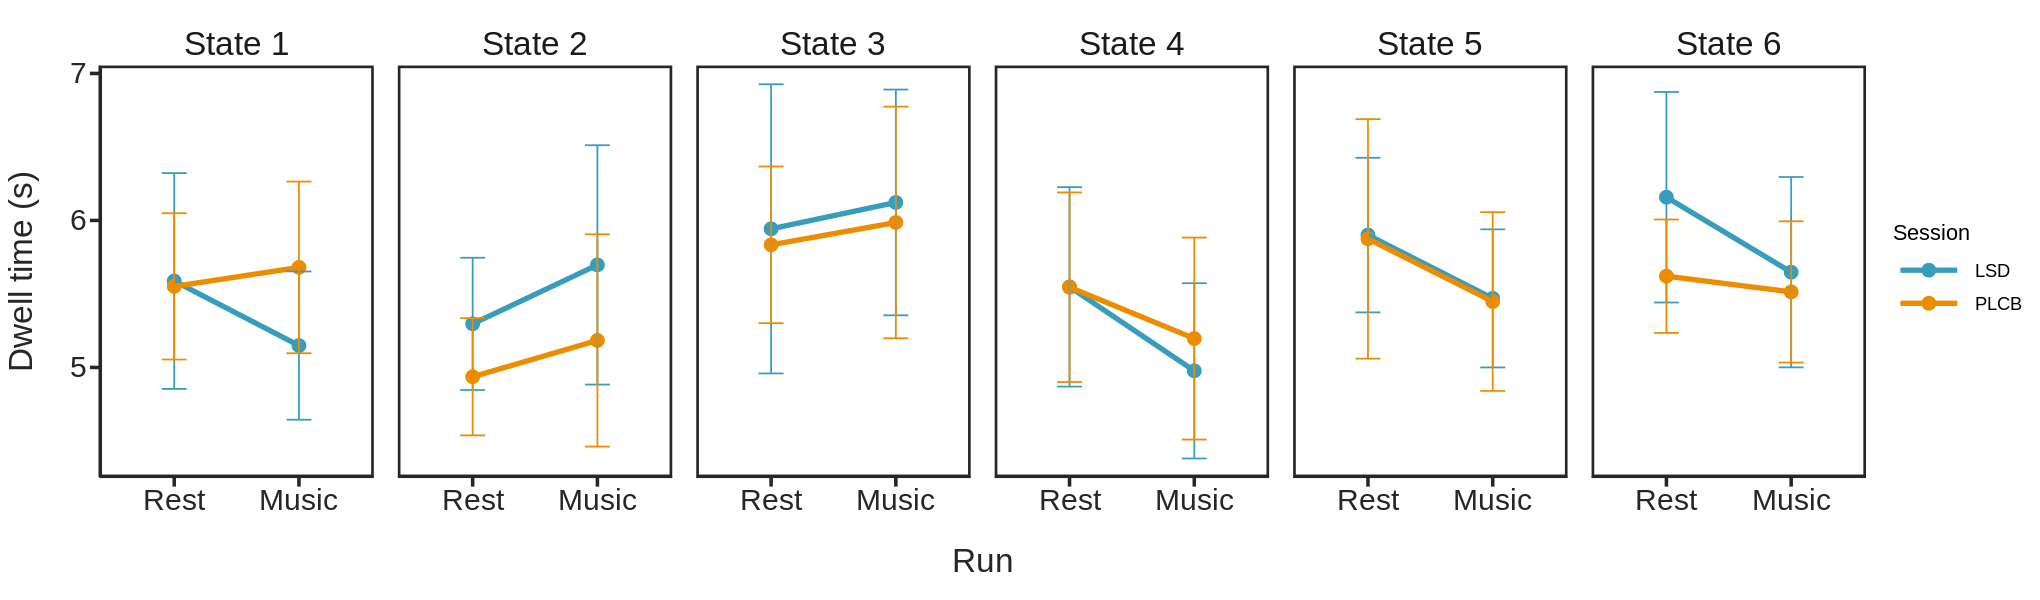

In [45]:
s6_dt_1vs2 <- ggplot(s6_data_run12, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s6_dt_1vs2)

In [46]:
#Saving the plot
ggsave("Figures/6_states/dt_1vs2.jpg", width = 17, height = 5)

#### **Plotting the results for resting-state before music listening vs. resting-state after music listening** ####

#### Step 5.3: Plotting the results for fractional occupancy ####

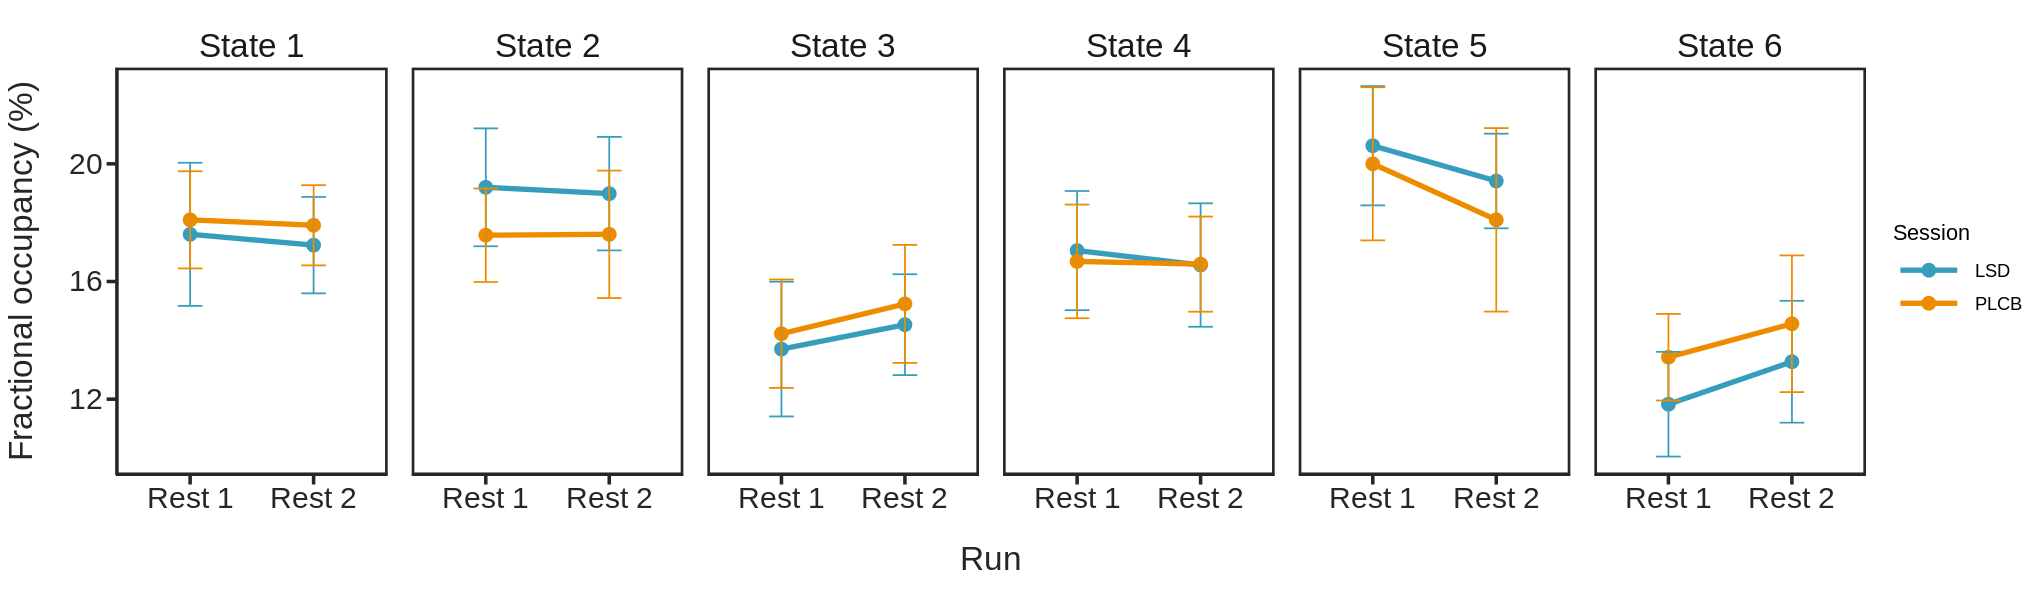

In [47]:
s6_fo_1vs3 <- ggplot(s6_data_run13, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s6_fo_1vs3)

In [48]:
#Saving the plot
ggsave("Figures/6_states/fo_1vs3.jpg", width = 17, height = 5)

#### Step 5.4: Plotting the results for dwell time ####

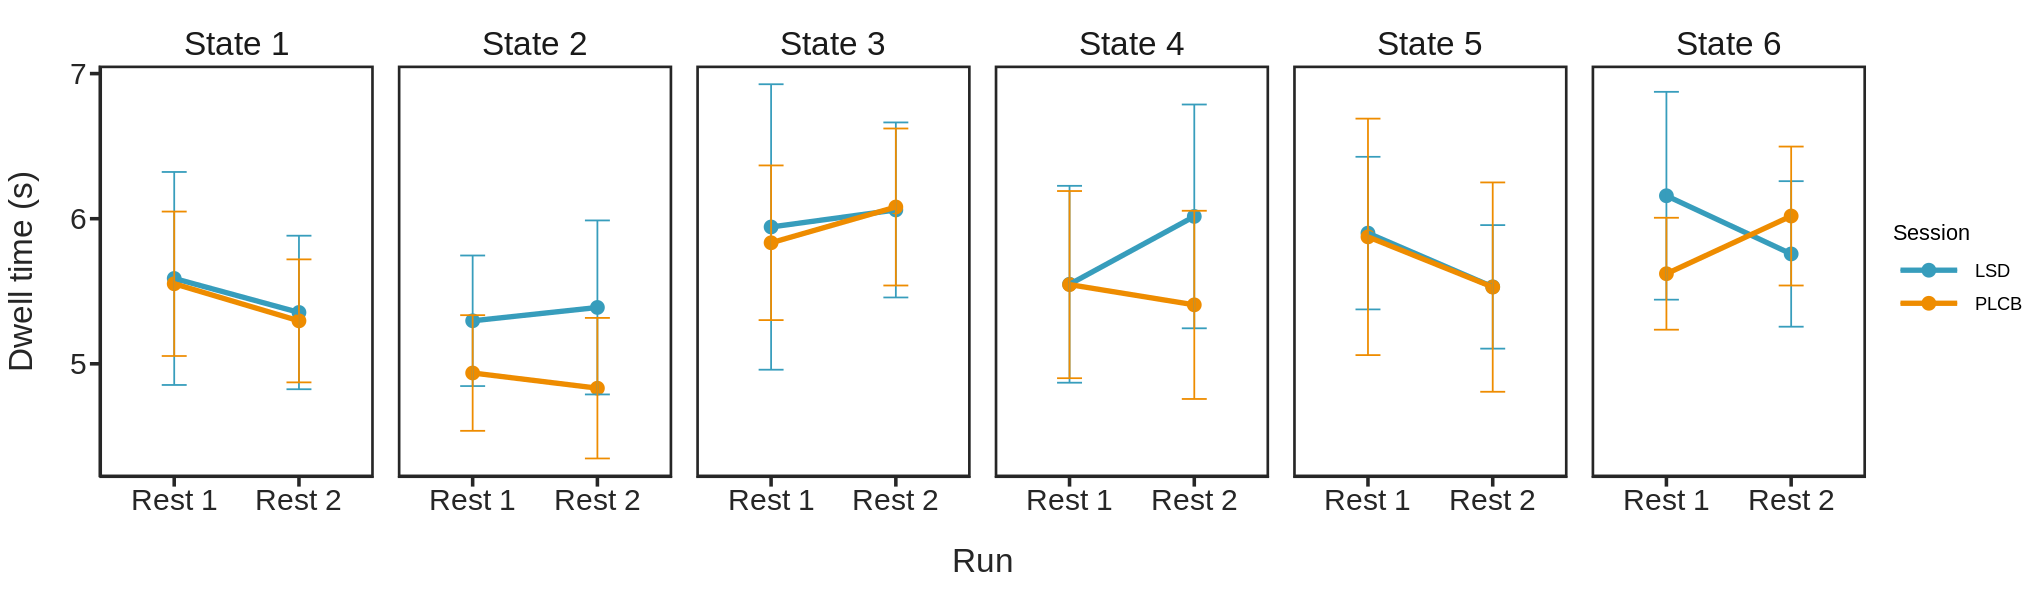

In [49]:
s6_dt_1vs3 <- ggplot(s6_data_run13, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s6_dt_1vs3)

In [50]:
#Saving the plot
ggsave("Figures/6_states/dt_1vs3.jpg", width = 17, height = 5)